In [1]:
import numpy as np                  #импорт
import pandas as pd                 #необъодимых
import matplotlib.pyplot as plt     #библиотек

### Получение датасета и информация о нем

In [3]:
data = pd.read_csv("Student_Performance.csv")
data['Extracurricular Activities'].replace({'Yes': 1,'No': 0}, inplace=True)
print(data)
data.info()
data.describe()

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Paper

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


### Гистограммы

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Extracurricular Activities'}>,
        <Axes: title={'center': 'Sleep Hours'}>],
       [<Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>]], dtype=object)

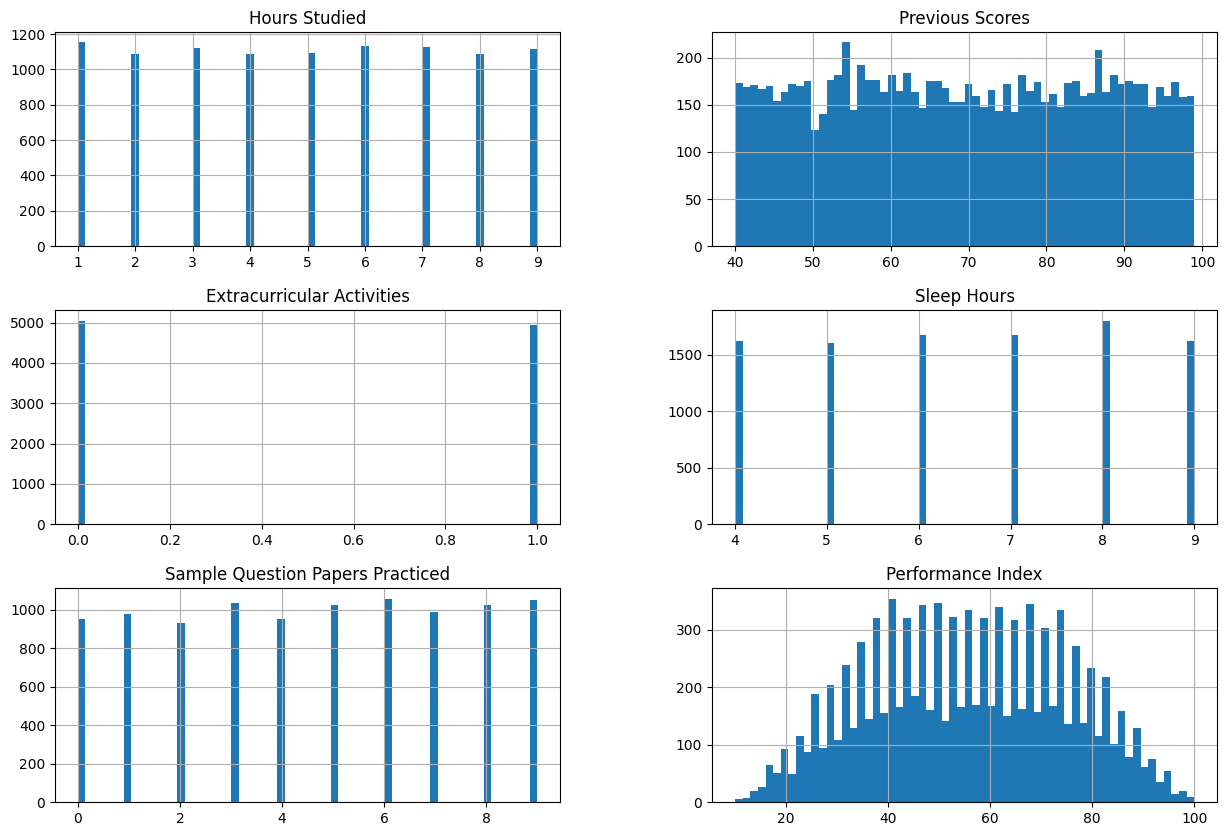

In [4]:
data.hist(bins=60, figsize=(15, 10))

### Корелляция

                                  Hours Studied  Previous Scores  \
Hours Studied                          1.000000        -0.012390   
Previous Scores                       -0.012390         1.000000   
Extracurricular Activities             0.003873         0.008369   
Sleep Hours                            0.001245         0.005944   
Sample Question Papers Practiced       0.017463         0.007888   
Performance Index                      0.373730         0.915189   

                                  Extracurricular Activities  Sleep Hours  \
Hours Studied                                       0.003873     0.001245   
Previous Scores                                     0.008369     0.005944   
Extracurricular Activities                          1.000000    -0.023284   
Sleep Hours                                        -0.023284     1.000000   
Sample Question Papers Practiced                    0.013103     0.003990   
Performance Index                                   0.024525 

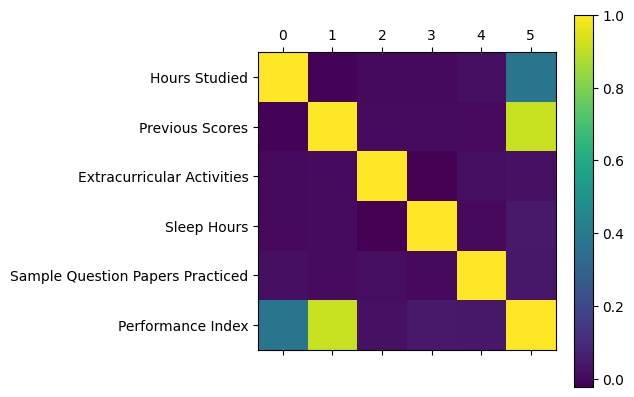

In [16]:
print(data.corr())
plt.matshow(data.corr())
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()

### Среднее Performance Index по Hours Studied

<Axes: xlabel='Hours Studied'>

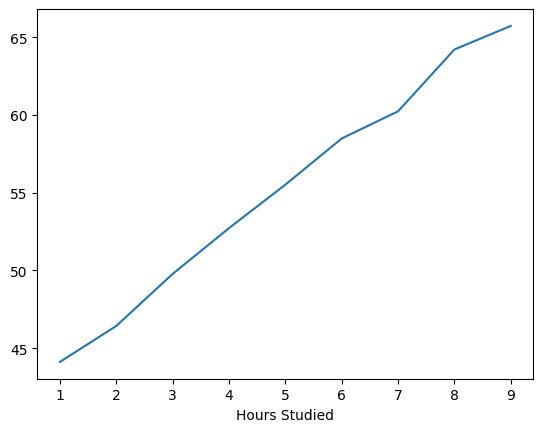

In [22]:
data.groupby('Hours Studied')['Performance Index'].mean().plot()

### Разброс

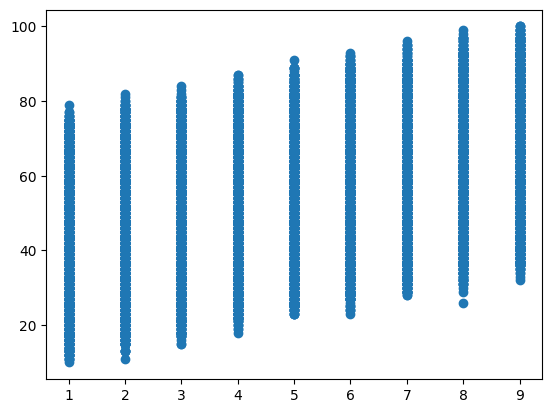

In [18]:
plt.scatter(data['Hours Studied'], data['Performance Index'])

### Тоже самое по Previous Scores

<Axes: xlabel='Previous Scores'>

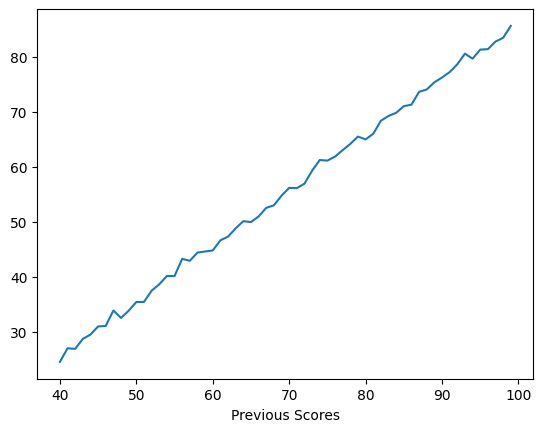

In [21]:
data.groupby('Previous Scores')['Performance Index'].mean().plot()

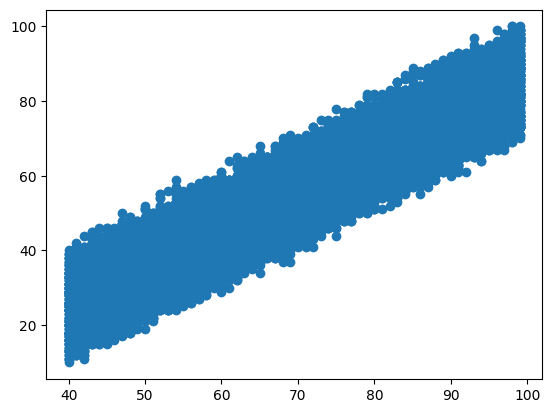

In [23]:
plt.scatter(data['Previous Scores'], data['Performance Index'])

### Разбиение данных на тренировочную и тестовую выборки


In [24]:
train_percent = 0.7
train = data.sample(frac=train_percent)
test = data.drop(train.index)
X_train = train.drop('Performance Index', axis=1)
Y_train = train['Performance Index']
X_test = test.drop('Performance Index', axis=1)
Y_test = test['Performance Index']

### Методы для тренировки и обучения

In [25]:
def prepend_ones(x): return np.concatenate((np.ones((len(x), 1)), x), axis=1)
def sqr_sum(first, second): return np.sum(np.square(first - second))
def determination_coefficient(Y_true, Y_pred): return 1 - sqr_sum(Y_true, Y_pred) / sqr_sum(Y_true, np.mean(Y_true))
def training(x, y, col_names):
    x = prepend_ones(np.array(x[col_names]))
    y = np.array(y)
    return np.linalg.inv((x.T @ x)) @ x.T @ y
def prediction(x, b, col_names) -> list[float]: return np.array(prepend_ones(x[col_names])) @ b.T

### Базовая модель

In [26]:
beta = training(X_train, Y_train, X_train.columns)
Y_pred = prediction(X_test, beta, X_train.columns)
print('Коэффициент детерминации отклонений:', determination_coefficient(Y_test, Y_pred))
print('Сумма квадратов отклонений:', sqr_sum(Y_test, Y_pred))

Коэффициент детерминации отклонений: 0.9885210646523878
Сумма квадратов отклонений: 12587.536023694882


### Модель по Previous Scores

In [28]:
beta = training(X_train, Y_train, ['Previous Scores'])
Y_pred = prediction(X_test, beta, ['Previous Scores'])
print('Коэффициент детерминации:', determination_coefficient(Y_test, Y_pred))
print('Сумма квадратов:', sqr_sum(Y_test, Y_pred))

Коэффициент детерминации: 0.8404074848440631
Сумма квадратов: 175005.47505525366


### Модель по Sleep Hours

In [30]:
beta = training(X_train, Y_train, ['Sleep Hours'])
Y_pred = prediction(X_test, beta, ['Sleep Hours'])
print('Коэффициент детерминации:', determination_coefficient(Y_test, Y_pred))
print('Сумма квадратов отклонений:', sqr_sum(Y_test, Y_pred))

Коэффициент детерминации: 0.004169128208018735
Сумма квадратов отклонений: 1092005.1897318568


### Модель по Hours Studied и Previous Scores

In [29]:
beta = training(X_train, Y_train, ['Hours Studied', 'Previous Scores'])
Y_pred = prediction(X_test, beta, ['Hours Studied', 'Previous Scores'])
print('Коэффициент детерминации:', determination_coefficient(Y_test, Y_pred))
print('Сумма квадратов отклонений:', sqr_sum(Y_test, Y_pred))

Коэффициент детерминации: 0.9857699578826836
Сумма квадратов отклонений: 15604.336320935394


### Выводы

Модель по Sleep Hours показала наименьшую зависимость. Модель по Hours Studied и Previous Scores - наиболее близкую к модели по всем признакам (очень близкую к единице). Кроме того, коэффициент детерминации толлко по Previous Scores так же показал довольно большой коэффициент детерминации. Можно сделать вывод, что наибольшее влияние на результат оказывает то, насколько много познаний имеет студент. Количество часов на подготовку так же может достаточо сильно, но в меньшей мере изменить результат. Остальные признаки (как например количество сна) в незначительной степени, но все же влияют.  